# Veg Data Model

## Image Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
x_train=train_datagen.flow_from_directory(
    "D:\\VII SEMSETER\\IBM\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\train_set",
    target_size=(128,128),
    class_mode='categorical',
    batch_size=24)

Found 11386 images belonging to 9 classes.


In [13]:
x_test=test_datagen.flow_from_directory(
    'D:\\VII SEMSETER\\IBM\\Fertilizers_Recommendation_ System_For_Disease_ Prediction\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set',
    target_size=(128,128),
    batch_size=24,
    class_mode='categorical')

Found 3416 images belonging to 9 classes.


In [14]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

# CNN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# Hidden Layers

In [18]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output Layer

In [19]:
model.add(Dense(9,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
len(x_train)

475

In [22]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_12036\1582812018.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
475/475 [==============================] - 1783s 4s/step - loss: 1.3567 - accuracy: 0.5893 - val_loss: 0.9078 - val_accuracy: 0.6909
Epoch 2/10
475/475 [==============================] - 862s 2s/step - loss: 0.6055 - accuracy: 0.7880 - val_loss: 0.5011 - val_accuracy: 0.8282
Epoch 3/10
475/475 [==============================] - 710s 1s/step - loss: 0.4516 - accuracy: 0.8400 - val_loss: 0.3695 - val_accuracy: 0.8615
Epoch 4/10
475/475 [==============================] - 822s 2s/step - loss: 0.3837 - accuracy: 0.8637 - val_loss: 0.3605 - val_accuracy: 0.8727
Epoch 5/10
475/475 [==============================] - 771s 2s/step - loss: 0.3451 - accuracy: 0.8757 - val_loss: 0.2697 - val_accuracy: 0.9090
Epoch 6/10
475/475 [==============================] - 616s 1s/step - loss: 0.2905 - accuracy: 0.8974 - val_loss: 0.1939 - val_accuracy: 0.9268
Epoch 7/10
475/475 [==============================] - 582s 1s/step - loss: 0.2844 - accuracy: 0.8978 - val_loss: 0.2092 - val_accuracy: 0.925

## Saving Model

In [24]:
ls

 Volume in drive D is Education Content
 Volume Serial Number is 3086-4A3F

 Directory of D:\VII SEMSETER\IBM\Project Development Phase\Sprint 2\Model Building

07-11-2022  21:32    <DIR>          .
07-11-2022  21:32    <DIR>          ..
07-11-2022  11:32    <DIR>          .ipynb_checkpoints
07-11-2022  19:23    <DIR>          CNN Model
06-11-2022  20:26       457,840,960 fruit_datamodel.h5
07-11-2022  11:32           212,106 fruit_model.ipynb
06-11-2022  22:35            14,005 Untitled.ipynb
07-11-2022  21:32             9,365 veg_model.ipynb
               4 File(s)    458,076,436 bytes
               4 Dir(s)  283,497,824,256 bytes free


In [25]:
model.save('veg_datamodel.h5')

In [26]:
ls

 Volume in drive D is Education Content
 Volume Serial Number is 3086-4A3F

 Directory of D:\VII SEMSETER\IBM\Project Development Phase\Sprint 2\Model Building

07-11-2022  21:34    <DIR>          .
07-11-2022  21:34    <DIR>          ..
07-11-2022  11:32    <DIR>          .ipynb_checkpoints
07-11-2022  19:23    <DIR>          CNN Model
06-11-2022  20:26       457,840,960 fruit_datamodel.h5
07-11-2022  11:32           212,106 fruit_model.ipynb
06-11-2022  22:35            14,005 Untitled.ipynb
07-11-2022  21:33       457,846,360 veg_datamodel.h5
07-11-2022  21:34            10,594 veg_model.ipynb
               5 File(s)    915,924,025 bytes
               4 Dir(s)  283,039,977,472 bytes free


## Testing the Model

In [27]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('veg_datamodel.h5')

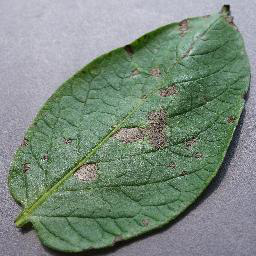

In [29]:
img=image.load_img(r"D:\VII SEMSETER\IBM\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight\c2cc82b8-9f74-4e40-9792-c121a89a84c0___RS_Early.B 8524.JPG")
img

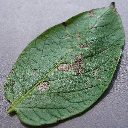

In [30]:
img=image.load_img(r"D:\VII SEMSETER\IBM\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Potato___Early_blight\c2cc82b8-9f74-4e40-9792-c121a89a84c0___RS_Early.B 8524.JPG",target_size=(128,128))
img

In [31]:
x=image.img_to_array(img)

In [32]:
x

array([[[182., 181., 195.],
        [185., 184., 198.],
        [186., 185., 199.],
        ...,
        [182., 184., 199.],
        [181., 183., 198.],
        [191., 193., 208.]],

       [[183., 182., 196.],
        [185., 184., 198.],
        [186., 185., 199.],
        ...,
        [181., 183., 198.],
        [176., 178., 193.],
        [180., 182., 197.]],

       [[181., 180., 194.],
        [183., 182., 196.],
        [184., 183., 197.],
        ...,
        [183., 185., 200.],
        [186., 188., 203.],
        [170., 172., 187.]],

       ...,

       [[109., 105., 119.],
        [120., 116., 130.],
        [145., 141., 155.],
        ...,
        [122., 121., 137.],
        [118., 117., 133.],
        [121., 120., 136.]],

       [[115., 111., 125.],
        [118., 114., 128.],
        [127., 123., 137.],
        ...,
        [123., 122., 138.],
        [116., 115., 131.],
        [116., 115., 131.]],

       [[123., 119., 133.],
        [123., 119., 133.],
        [146., 1

In [33]:
x=np.expand_dims(x,axis=0)

In [34]:
x

array([[[[182., 181., 195.],
         [185., 184., 198.],
         [186., 185., 199.],
         ...,
         [182., 184., 199.],
         [181., 183., 198.],
         [191., 193., 208.]],

        [[183., 182., 196.],
         [185., 184., 198.],
         [186., 185., 199.],
         ...,
         [181., 183., 198.],
         [176., 178., 193.],
         [180., 182., 197.]],

        [[181., 180., 194.],
         [183., 182., 196.],
         [184., 183., 197.],
         ...,
         [183., 185., 200.],
         [186., 188., 203.],
         [170., 172., 187.]],

        ...,

        [[109., 105., 119.],
         [120., 116., 130.],
         [145., 141., 155.],
         ...,
         [122., 121., 137.],
         [118., 117., 133.],
         [121., 120., 136.]],

        [[115., 111., 125.],
         [118., 114., 128.],
         [127., 123., 137.],
         ...,
         [123., 122., 138.],
         [116., 115., 131.],
         [116., 115., 131.]],

        [[123., 119., 133.],
       

In [35]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 10s 10s/step


In [36]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [37]:
index = ['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [38]:
index[y[0]]

'Tomato___Septoria_leaf_spot'